# Regression

Regression is a kind of machine learning task; the goal is to learn a continuous function from a discrete set of points. But what does that mean?

To understand this, lets look at an example. Here is a file with a bunch of random data in it. Let's load it in and plot the points:

In [1]:
# import the things we will need;
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from typing import List, Callable

# including our utils
from utils import setup_check, load_ans
ans = load_ans()

# load in the answers we need
check = setup_check()

In [2]:
data1 = pd.read_csv("./data/data1.csv")
data1.head()

,x,y
0,9,38
1,15,62
2,64,258
3,28,114
4,89,358


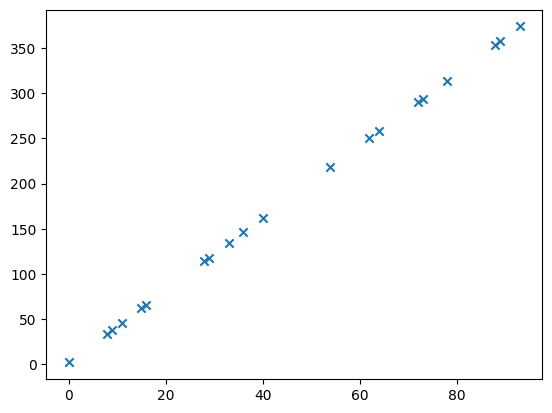

In [3]:
plt.scatter(data1["x"], data1["y"], marker="x")

Hopefully, from this it's fairly obvious that the points all lie on a straight line.

Now, if you cast your mind back to pre-GCSE maths, you may recall that straight lines are described by equations of the form

$$
y = mx + c
$$

This is a function; we give it a value of x, and we can work out the value of y. It's also continous - you can make tiny changes to x and correspondingly tiny changes in y. Lets say we wanted to work out what line describes the points above - how would we do that?

For this example, its quite trivial; The data lies on an exact line; so we can actually work it out with some simple algebra.

If we know two points, we have enough to work out the equation. See if you can do that below:

In [4]:
# Fill in some code below to work out m and c for this data set; the next cell will check your answers
# try to compute these values from the data, if you can

xs = data1["x"]
ys = data1["y"]

dx = xs[1] - xs[0]
dy = ys[1] - ys[0]

m1 = int(dy/dx) # write in your value for the gradient of the line above

c1 = int(ys[0] - m1 * xs[0]) # write in your value for the intercept of the line above
print(m1, c1)

4 2


4
2


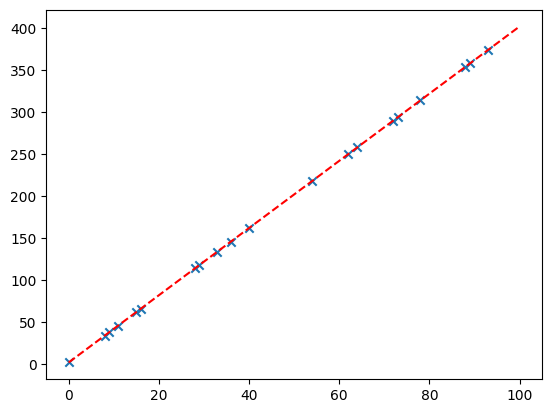

In [11]:
check("m1", m1)
check("c1", c1)

plt.scatter(data1["x"], data1["y"], marker="x")
xs = [0, 100]
ys = [m1 * x + c1 for x in xs]
plt.plot(xs, ys, linestyle="dashed", color="red")


If all went well, those two checks should have passed just fine, and the line on the graph should line up nicely with the points. Congratulations! You have performed regression.

This is all well and good, but its not really machine learning. Real data isn't quite so convenient - its noisy. Here is a more realistic example:

In [12]:
# load in data-2
data2 = pd.read_csv("./data/data2.csv")
data2.head()

,x,y
0,49,195
1,51,183
2,54,198
3,77,275
4,69,252


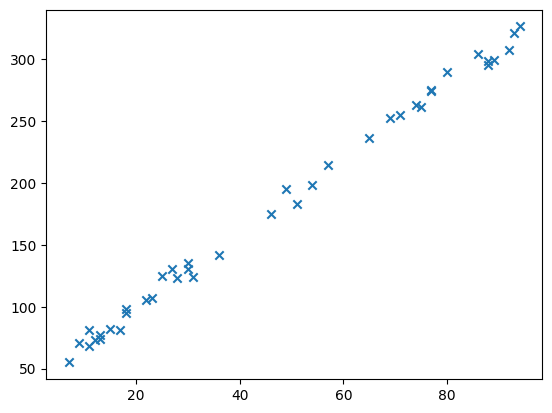

In [13]:
plt.scatter(data2["x"], data2["y"], marker="x")

As you can see, the data is clearly centred around a line, but it doesn't lie exactly on it. We want a way to capture the intuitive 'line of best fit'. But we also want this idea to be rigorous. How do we do that?

## Models
First let's talk about models. Models are what we make in machine learning. They recognise patterns or make predictions. They 'model' real data - they should approximate it. One way to think about models is that they are theories we have about the underlying structure of the data.


In the example above, it looks like the data all lies on a line, but are disturbed off it somehow - as if there is some kind of noise in our measurement. So, we might theorize that the data really follows the form:

$$
y = mx + c + (\text{noise})
$$

This is a simple linear model; Linear here is a confusing term - you might think that it's because the model follows a linear equation (and it is sometimes used in that way). However, it is also linear in the sense that it is a *linear combination* of some variables - i.e. all we do to those variables is scale and add them together.

This model has two parameters; m and c. It's conventional to use $w$ to represent the parameters. So let's re-write the model equation a bit:

$$
y = w_0 + w_1 x + (\text{noise})
$$

Note that c is $w_0$. This is because its the coefficient of $x^0 = 0$. Whereas $m$ or $w_1$ is the coefficient of $x^1 = x$.

We want to know what parameters our model needs to use to be accurate to the data. We want to extract out the underlying relationship in the data - the $y=mx+c$ part. For now, let's take a couple guesses. Lets say theory 1 is:
$$
y = 20 + 3x
$$

And that theory 2 is:

$$
y = 9 + 5x
$$

Your task is to write an implementation for these models. From a programming perspective, a regression model can be thought of as just a function; it maps input data (`x`) to a prediction (`f(x)`) of the output data (`t`).

In [14]:
# implement your model for theory 1
def model1(x: int) -> int:
    return 2* x + 20

# implement your model for theory 2
def model2(x:int) -> int:
    return 5*x + 9

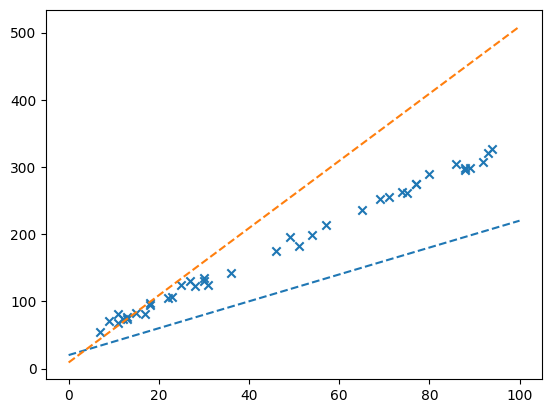

In [15]:
plt.scatter(data2["x"], data2["y"], marker="x")
xs = [0, 100]

# plotting theory 1
ys = [model1(x) for x in xs]
plt.plot(xs, ys, linestyle="dashed")

# plotting theory 2
ys = [model2(x) for x in xs]
plt.plot(xs, ys, linestyle="dashed")

### BONUS TASK
Can you write a general form of the linear model? One where we can pass in the parameters?

Really, we want the signature of the actual model function to be the same as for the other two we defined - how could we do that? (hint: factory function)

In [17]:
# one potential solution: (1 mark)
def linear_model(x, w0, w1):
    return w0 + w1 * x


# an alternative (that complies with general model signature):
def make_lin_model(w0, w1):
    def m(x):
        return w0 + w1 * x
    
    return m

## How good are our models?
These two models are very different. Depending on what your particular data set looks like, one of them could be brilliant, but it's more likely they're both terrible. However its also likely that one is better than the other.

We can intuitively see this - the line is closer to the data points - but can we devise a way to measure it, formally?

A simple way to do this is to just think about how 'wrong' the model is in a literal sense. We can find the difference between our prediction and the real value at one particular point. This difference is called the error:


$$
E = y - f(x)
$$

We compute this here for individual data points, but we can also compute it for all our data points, and add up the error to get a sense for how the model performs overall. 

$$
E = \sum_{i =0} ^{|X|} y_i - f(x_i)
$$

In fact why not take the mean?

$$
ME = \frac{1}{|X|} \sum_{i =0} ^{|X|} y_i - f(x_i)
$$

Now a problem can arise - if we overshoot some values, but undershoot others, then when we add up the errors, they could cancel out. This is bad! So we need a way to add them up without them cancelling.

You might imagine just taking the absolute value of the error before summing, but there are problems with this - the `abs` function has some nasty algebraic properties that make it harder to work with. For this reason, we prefer a different method: *squaring* the error. Applying this idea to the mean of the error gives us the mean square error, or "MSE".


$$
MSE = \frac{1}{|X|} \sum_{i =0} ^{|X|} (y_i - f(x_i))^2
$$

This is a simple but effective measure of how good our model is; A better model has lower MSE.
In machine learning, we call a function that helps us measure how good a model is a loss function. Its written $\mathcal{L}$. 

What are the parameters to $\mathcal{L}$? We need to give it a model of course, but also something to measure it against - we need input values $x$, and also true values $y$. 

We've written a function signature out below - fill in an implementation for loss.

In [10]:
# Note `Callable[[int], int]` means a function of the form `(x: int) -> int`

def loss(xs: List[int], ys: List[int], model: Callable[[int], int]) -> int:
    # as a nice one-liner
    # return sum([(y - model(x)) ** 2 for (x, y) in zip(xs, ys)])
    total = 0;
    for x, y in zip(xs, ys):
        t = model(x)
        error = y - t
        squareError = error ** 2
        total += squareError
    return total

In [13]:
xs = data2["x"]
ys = data2["y"]

check("loss1", loss(xs, ys, model1))
check("loss2", loss(xs, ys, model2))

212768
299957


## Optimisation
So, now we have a definition for models, and a way to measure how good they are. What do we do next?

We want to find the best line - the model that fits our data most closely. We measure the quality of the fit with loss. We want to know the parameters to our model that produce the **minimum loss** - and therefore will give us the 'best' results. There are a few approaches to this that we can take to figure out these parameter values.


First, have a look at our loss function again:
$$
\mathcal{L} =  \frac{1}{|X|} \sum_{i =0} ^{|X|} (y_i - f(x_i))^2
$$

We can substitute out the function $f(x)$ for the actual equation the model uses:

$$
\mathcal{L} =  \frac{1}{|X|} \sum_{i =0} ^{|X|} (y_i - (w_0 + w_1x_i ))^2
$$

Because we are using MSE, the loss is actually a quadratic function of both our parameters. And therefore, it is *guaranteed* to have a global minima for each.

We can find this analytically. It's a quadratic curve, so we know that its minimum exists where $\frac{dy}{dw}=0$. So, all we have to do is find the derivative of loss, and then find the root. Simple!


Well, alright, the calculus isn't really all that nice. We have the full derivation listed out [here](https://site/regression/maths/analitic-loss) if you want to have a look - and we do recommend that you have a go at deriving it yourself first. That page also lists a bunch of useful identities for doing that.


But, if you're ready to move on, the important thing is that we can find definite values of $w_0$ and $w_1$, given by the following equations:


N.B. The bar denotes average
$$
\begin{align*}
w_{0} & =\bar{t} - \left(\frac{\bar{tx} - \bar{t}\bar{x} }{\bar{x^{2}} -\bar{x}^{2}} \right)\bar{x} \\ \\
w_{1} &= \frac{\bar{tx} - \bar{t}\bar{x} }{\bar{x^{2}} -\bar{x}^{2}} 
\end{align*}
$$


So, your task is as follows: compute the optimal parameters for a model that fits `data2`. Bonus points if you can write a function that takes in `x` and `y`. Be careful to use the right values: $\bar{tx}$ is different to $\bar{t}\bar{x}$.

Then, using these optimal parameters, create a model (called `opti_model`). We will plot this against the data, so you can visually inspect how well it fits

In [28]:
# your solution here....
def optimise(xs, ts):
    tbar = ts.mean()
    xbar = xs.mean()
    txbar = (xs * ts).mean()

    x_sqr_bar = (xs ** 2).mean()

    w0 = tbar - (
        (txbar - (xbar * tbar))/ (x_sqr_bar - xbar**2)
    
    ) * xbar

    w1 = (txbar - xbar * tbar) / (x_sqr_bar - xbar ** 2)
    
    return (w0, w1)

w0, w1 = optimise(data2["x"], data2["y"])

opti_model = make_lin_model(w0, w1)

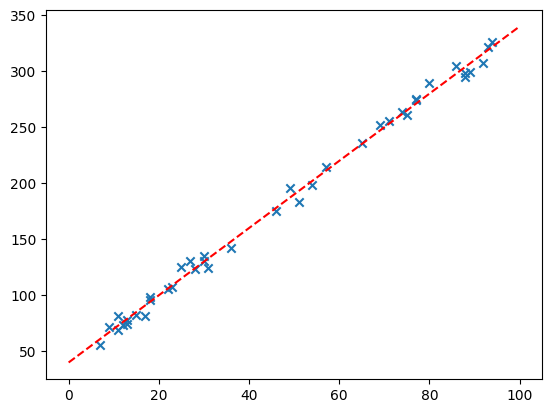

In [29]:
plt.scatter(data2["x"], data2["y"], marker="x")
xs = [0, 100]

# plotting theory 1
ys = [opti_model(x) for x in xs]
plt.plot(xs, ys, linestyle="dashed", color="red")

If you did this correctly, you should have a nice straight line going through your data.

## Wrap-up

In general, we can extend this idea - of solving things analytically - to any kind of model we would want. For example:

$$
\begin{align}
y = w_0 + w_1 \sin(w_2x)s\\
\mathcal{L} =  \frac{1}{|X|} \sum_{i =0} ^{|X|} (y_i - (w_0 + w_1 \sin(w_2x) ))^2
\end{align}
$$

All you have to do is take the derivative, and find the stationary points of the loss. N.B. this is not a linear model in either of the senses we spoke about earlier; The model itself is not linear (it uses $\sin$) and it is not a simple linear combination (we also control the period of the $\sin$ with $w_2$).